In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import rv_continuous,rv_discrete
from scipy.integrate import quad
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html
#from colorspacious import cspace_converter
#cspace_convert()
#https://colorspacious.readthedocs.io/en/latest/reference.html
plt.rcParams["figure.figsize"] = (16,5)

In [2]:
h_pl=6.62607015e-34
c_sp=299792458
k_B=1.3806e-23 #J/K

def planckL(l,T):
    return 2*h_pl*c_sp**2/(l**5)*1/(np.exp(h_pl*c_sp/(l*k_B*T))-1)
def stefboltz(T):
    return T**4*2*np.pi**5*k_B**4/(15*c_sp**2*h_pl**3)
def p_g(x,al,m,s1,s2):
    if x>=m:
        s=s2
    else:
        s=s1
    return al*np.exp((x-m)**2/(-2*s**2))
s_low=1e-9
s_high=2000e-9
bin_amnt=8001

Text(0.5, 1.0, 'Sampled photons')

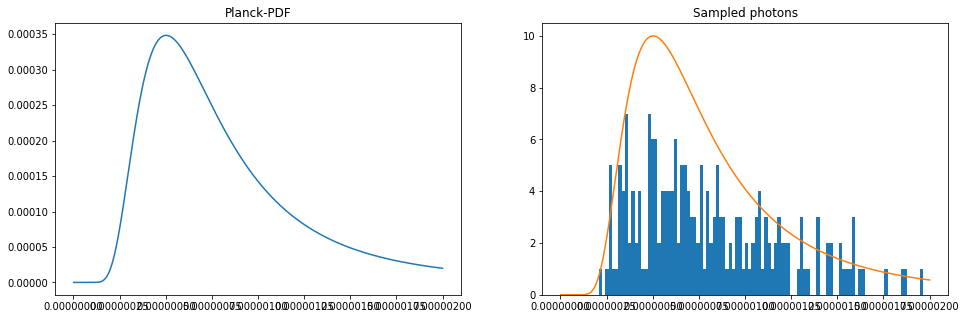

In [3]:
temp=5772
tot_radi,tot_gar=quad(lambda l:planckL(l,temp),s_low,s_high)#-np.inf,np.inf
pdf=[]
freqs=[]
bin_ls=np.linspace(s_low,s_high,bin_amnt)
for r in range(bin_amnt-1):
    my_rad,my_gar=quad(lambda l:planckL(l,temp),bin_ls[r],bin_ls[r+1])#1e-9,2000e-9
    pdf.append(my_rad/tot_radi)
    freqs.append((bin_ls[r]+bin_ls[r+1])/2)
def genWavelen():
    return np.random.choice(freqs,p=pdf)
photons=[]
for i in range(200):
    photons.append( genWavelen() )
#plt.hist(pdf,bins=100)
#ls=np.linspace(1e-9,10000e-9,12000)
#plt.plot(ls,planckL(ls,temp)/1e10)
po0,pa0=plt.subplots(1,2,figsize=(16,5))
pa0[0].plot(np.linspace(s_low,s_high,bin_amnt-1),np.array(pdf))
pa0[1].hist(photons,bins=100)
pa0[1].plot(np.linspace(s_low,s_high,bin_amnt-1),10*np.array(pdf)/max(pdf))
pa0[0].set_title("Planck-PDF")
pa0[1].set_title("Sampled photons")

In [10]:
expwav=[]
for i in range(100000):
    expwav.append(genWavelen())
np.savetxt("wavelen7.txt",expwav)

In [22]:
print("\1F4F1")

F4F1


Text(0.5, 1.0, 'XYZ tristimulus graphs')

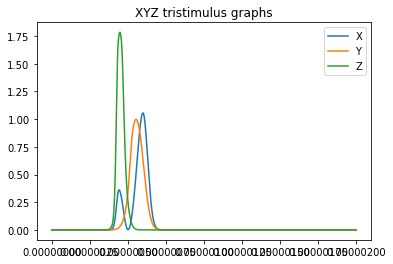

In [7]:
#xyz=[]
#p_g(400,1.056,5998,379,310)
pp_x=np.zeros(bin_amnt)
pp_y=np.zeros(bin_amnt)
pp_z=np.zeros(bin_amnt)
for i in range(bin_amnt):
    blabla=np.linspace(s_low*1e10,s_high*1e10,bin_amnt)
    pp_x[i]=p_g(blabla[i],1.056,5998,379,310)+p_g(blabla[i],0.362,4420,160,267)+p_g(blabla[i],-0.065,5011,204,262)
    pp_y[i]=p_g(blabla[i],0.821,5688,469,405)+p_g(blabla[i],0.286,5309,163,311)
    pp_z[i]=p_g(blabla[i],1.217,4370,118,360)+p_g(blabla[i],0.681,4590,260,138)
plt.plot(bin_ls,pp_x,label="X")
plt.plot(bin_ls,pp_y,label="Y")
plt.plot(bin_ls,pp_z,label="Z")
plt.legend()
plt.title("XYZ tristimulus graphs")

In [8]:
#http://www.brucelindbloom.com/index.html?Eqn_RGB_XYZ_Matrix.html
xyz2rgb=np.array([[3.2404542,-1.5371385,-0.4985314],[-0.9692660,1.8760108,0.0415560],[0.0556434,-0.2040259,1.0572252]])
def getXYZ(spect):
    x=y=z=0.0
    #xyz_ls=np.linspace(s_low,s_high,bin_amnt)
    for e in zip(range(bin_amnt),bin_ls):
        x+=spect[e[0]]*(p_g(e[1]*1e10,1.056,5998,379,310)+p_g(e[1]*1e10,0.362,4420,160,267)+p_g(e[1]*1e10,-0.065,5011,204,262))
        y+=spect[e[0]]*(p_g(e[1]*1e10,0.821,5688,469,405)+p_g(e[1]*1e10,0.286,5309,163,311))
        z+=spect[e[0]]*(p_g(e[1]*1e10,1.217,4370,118,360)+p_g(e[1]*1e10,0.681,4590,260,138))
    #m=max(x,y,z)
    #x/=m
    #y/=m
    #z/=m
    return [x,y,z]
def spec2rgb(spect,norm):
    rgb=xyz2rgb@np.array(getXYZ(spect))
    if(norm):
        m=max(rgb)
        if m!=0:
            rgb/=max(rgb)
    return rgb
def phot2spec(p):
    phot=np.zeros(bin_amnt)
    for i in range(bin_amnt-1):
        dif_h=np.sum(np.where(p<bin_ls[i+1],1,0))
        dif_l=np.sum(np.where(p<bin_ls[i],1,0))
        phot[i]=dif_h-dif_l
    return phot

rgb: [0.85581288 1.         0.84966891]


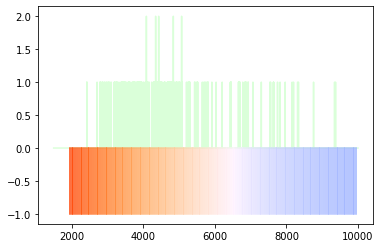

In [9]:
#xyz2rgb=np.array([[3.1338561,-1.6168667,-0.4906146],[-0.9787684,1.9161415,0.0334540],[0.0719453,-0.2289914,1.4052427]])
#my_ls=np.linspace(s_low,s_high,bin_amnt)

#Create spectrum from particles
phot=phot2spec(photons)

rgb=spec2rgb(phot,True)
if rgb[0]<0 or rgb[1]<0 or rgb[2]<0:
    print("rgb negative")
else:
    plt.plot(np.linspace(1500,10000,len(phot)),phot,color=rgb)
print("rgb:",rgb)

#Plot Planck-spectrum
temps=range(1500,10000,50)
for a in temps:
    my_spec=planckL(bin_ls,a)
    rgb=spec2rgb(my_spec,True)
    if rgb[0]<0 or rgb[1]<0 or rgb[2]<0:
        continue
    plt.plot([a,a],[-1,0],color=rgb)

#my_spec=planckL(bin_ls,8932)
#np.array(getRGB(my_spec))

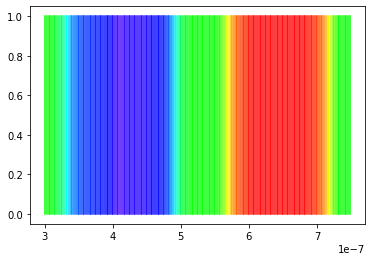

In [7]:
monoc=np.linspace(s_low,s_high,4)
for a in range(1200,3000,10):
    my_spec=np.zeros(bin_amnt)#planckL(bin_ls,a)
    my_spec[a]=2
    rgb=spec2rgb(my_spec,True)
    #print(rgb)
    #if rgb[0]<0 or rgb[1]<0 or rgb[2]<0:
        #continue
    rgb=np.array([max(0,rgb[0]),max(0,rgb[1]),max(0,rgb[2])])
    plt.plot([bin_ls[a],bin_ls[a]],[1,0],color=rgb)

In [8]:
"""cie=np.loadtxt("./cie_data.txt",skiprows=2)
#print("cie",cie.shape)
spec0=int(cie[0,0])
spec1=int(cie[-1,0])
def getRGB(spect):
    
    #print("spect",spect.shape)
    r=g=b=0.0
    #for i in range(1+spec1-spec0):
        #r+=spect[i]*cie[i,1]
        #g+=spect[i]*cie[i,2]
        #b+=spect[i]*cie[i,3]
    r_s=spect*cie[:,1]
    g_s=spect*cie[:,2]
    b_s=spect*cie[:,3]
    r=np.trapz(r_s)
    g=np.trapz(g_s)
    b=np.trapz(b_s)
    mm=max(r,g,b)
    r/=mm
    g/=mm
    b/=mm
    return [r,g,b]"""
"""class pl_gen(rv_continuous):
    "Planckian distribution"
    #def _pdf(self,l,T):
        #return planckL(l,T)
    def _cdf(self,x):
        if(x>=0):
            return .2
        elif(x>2):
            return 1
        else:
            return 0
aaa=pl_gen(name="pl_gen")
#rannums=[]
#for a in range(20):
aaa.rvs()
#plt.scatter(range(20),rannums)
"""
#aaa=np.random.Generator()
#for i in range(20):
    #print(np.random.choice(range(5),p=[.1,.1,.1,.6,.1]))
#for i in range(len(my_spec)):
    #my_spec[i]=planckL((spec0+i)*1e-9,1500)
#my_spec[500-spec0]=1.
print("")

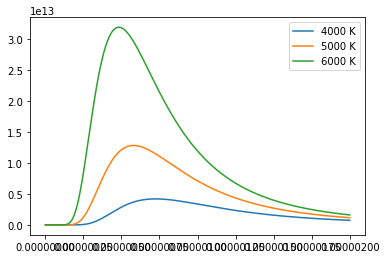

In [9]:
#ll=np.linspace(s_low,s_high,bin_amnt)
for r in range(4000,7000,1000):
    plt.plot(bin_ls,planckL(bin_ls,r),label=str(r)+" K")
plt.legend()
#plt.plot(ll,planckL(ll,6000))
#plt.scatter([481e-9,571e-9],[31.707e12,12.8e12])

In [10]:
r_plan=5000 #Planet radius
r_atm=6000  #Atmosfære radius
n_atm=1     #Atmosfære refraktionsindeks
rayleigh_coef=s_low**(4)*1e9
abs_pos=[]
abs_ang=[]
abs_wle=[]

dt=1e-9
rayleigh=True
class photon:
    def __init__(self,pos,dire,l):
        self.pos=pos  #position vector
        self.dire=dire#direction vector
        self.l=l      #wavelength
    def reInit(self,pos,dire,l):
        self.pos=pos  #position vector
        self.dire=dire#direction vector
        self.l=l      #wavelength
    def move(self):
        #plt.scatter([self.pos[0]],[self.pos[1]])
        th=self.dire[0]
        ph=self.dire[1]
        pdis=np.linalg.norm(self.pos)
        if pdis<r_atm and pdis>r_plan and rayleigh:
            #Rayleigh-scattering:
            if np.random.random()<rayleigh_coef*self.l**(-4):
                self.dire=np.array([2*np.pi,0])*np.random.random()
        if pdis>r_plan:
            self.pos=self.pos+dt*c_sp*np.array([np.sin(th)*np.cos(ph),np.sin(th)*np.sin(ph),np.cos(th)])
            if pdis>9000:
                self.reInit(np.array([-6200,r_atm*(2*np.random.random()-1),0]),np.array([np.pi/2,0]),genWavelen())
        else:
            abs_pos.append(np.arctan2(self.pos[1],self.pos[0]))
            abs_ang.append(self.dire[0])
            abs_wle.append(self.l)
            self.reInit(np.array([-6200,r_atm*(2*np.random.random()-1),0]),np.array([np.pi/2,0]),genWavelen())
P=[]
for i in range(1200):
    P.append(photon(np.array([-6200,r_atm*(2*np.random.random()-1),0]),np.array([np.pi/2,0]),genWavelen()))

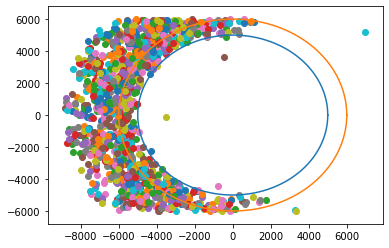

In [56]:
#Move all photons N times
for i in range(10000):
    for p_ins in P:
        p_ins.move()
#Draw photons on sketch
for p_ins in P:
    plt.scatter([p_ins.pos[0]],[p_ins.pos[1]])
    #print(p_ins.pos,p_ins.l)

phi=np.linspace(0,2*np.pi,360)
plt.plot(np.cos(phi)*r_plan,np.sin(phi)*r_plan)
plt.plot(np.cos(phi)*r_atm, np.sin(phi)*r_atm)

In [57]:
len(abs_ang)

1425

In [20]:
cppwav=np.loadtxt("wavelen0_out.txt",skiprows=1)
abs_pos=[]
abs_ang=[]
abs_wle=[]
for a in cppwav:
    if(a[0]==4):
        abs_pos.append(a[2])
        abs_ang.append(a[3])
        abs_wle.append(a[1])

maxintens 44.025058742495276


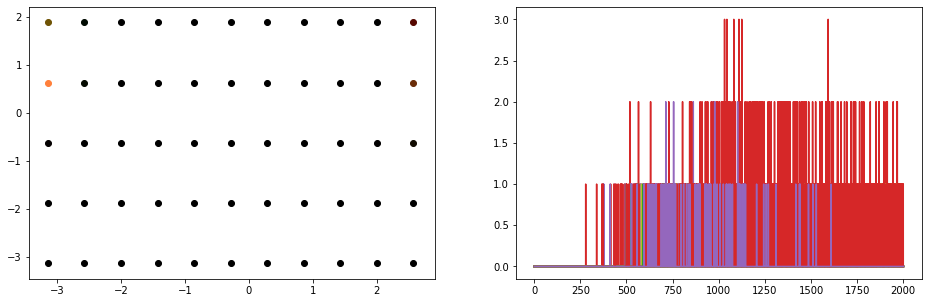

In [21]:

#for x_pl in np.linspace(0.0,1.0,12):
    #for y_pl in np.linspace(0.0,1.0,12):
        #plt.scatter([x_pl],[y_pl],color=[x_pl,y_pl,max(0,x_pl-y_pl)])
#for p_ins in P:
#    if p_ins.absorb:
#        abs_pos.append(np.arctan2(p_ins.pos[1],p_ins.pos[0]))
#        abs_ang.append(p_ins.dire[0])
#        abs_wle.append(p_ins.l)
        #plt.scatter([ap],[0],color=[0,0,0])
plan_div=12
ang_div=6
plan_ls=np.linspace(-np.pi,np.pi,plan_div)
ang_ls=np.linspace(-np.pi,np.pi,ang_div)
po1,pa1=plt.subplots(1,2,figsize=(16,5))
rgb=[]
for pd in range(plan_div-1):#np.linspace(-np.pi,np.pi,plan_div)
    rgb.append([])
    for ad in range(ang_div-1):
        wavelens=[]
        for p_ins in zip(abs_pos,abs_ang,abs_wle):
            if plan_ls[pd]<=p_ins[0]<plan_ls[pd+1] and ang_ls[ad]<=p_ins[1]<ang_ls[ad+1]:
                wavelens.append(p_ins[2])
        phot=phot2spec(wavelens)
        myrgb=spec2rgb(phot,False)
        #print(pd,ad,myrgb)
        pa1[1].plot(np.linspace(s_low*1e9,s_high*1e9,bin_amnt),phot)
        #pa1[1].scatter(wavelens,[-.1]*len(wavelens))
        #print(wavelens,myrgb)
        rgb[pd].append(np.array([max(0,myrgb[0]),max(0,myrgb[1]),max(0,myrgb[2])]))
        #if rgb[0]<0 or rgb[1]<0 or rgb[2]<0:
            #rgb=np.zeros(3)
#Find max intensity (max component) of rgb matrix
maxintens=0
for pd in range(plan_div-1):
    for ad in range(ang_div-1):
        maxintens=max(maxintens,rgb[pd][ad][0])
        maxintens=max(maxintens,rgb[pd][ad][1])
        maxintens=max(maxintens,rgb[pd][ad][2])
print("maxintens",maxintens)
if(maxintens>0):
    for pd in range(plan_div-1):
        for ad in range(ang_div-1):
            pa1[0].scatter(plan_ls[pd],ang_ls[ad],color=rgb[pd][ad]/maxintens)

In [14]:
print(" convolve:",np.convolve([1,0,2,0],[1,4]))
print("histogram:",np.histogram([0,0.1,0.3,4,9],bins=range(10)))

 convolve: [1 4 2 8 0]
histogram: (array([3, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


In [26]:
abcd=[]
abcd.append([])
abcd[0].append(3)
abcd[0].append(4)
abcd[0].append(6)
abcd.append([])
abcd[1].append(4)
abcd[1].append(4)
abcd

[[3, 4, 6], [4, 4]]